In [5]:
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns

# 1. Load iris dataset (no errors here)
iris = datasets.load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
print("Iris dataset (first 5 rows):")
print(df_iris.head())

# 2. Load Titanic dataset (no errors here)
df_titanic = sns.load_dataset('titanic')
print("\nTitanic dataset (first 5 rows):")
print(df_titanic.head())

# 3. Create random test data (updated method)
# Option 1: Using numpy random (recommended)
df_random = pd.DataFrame({
    'A': np.random.rand(5),
    'B': np.random.randint(1, 100, 5),
    'C': list('abcde'),
    'D': pd.date_range('20230101', periods=5)
})
print("\nRandom test data (numpy method):")
print(df_random)

# Option 2: If you specifically need the old makeDataFrame functionality:
try:
    from pandas._testing import makeDataFrame  # For pandas ≥1.0
    df_test = makeDataFrame()
    print("\nRandom test data (pandas testing method):")
    print(df_test.head())
except ImportError:
    print("\nPandas testing module not available - using numpy method instead")

Iris dataset (first 5 rows):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Titanic dataset (first 5 rows):
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck

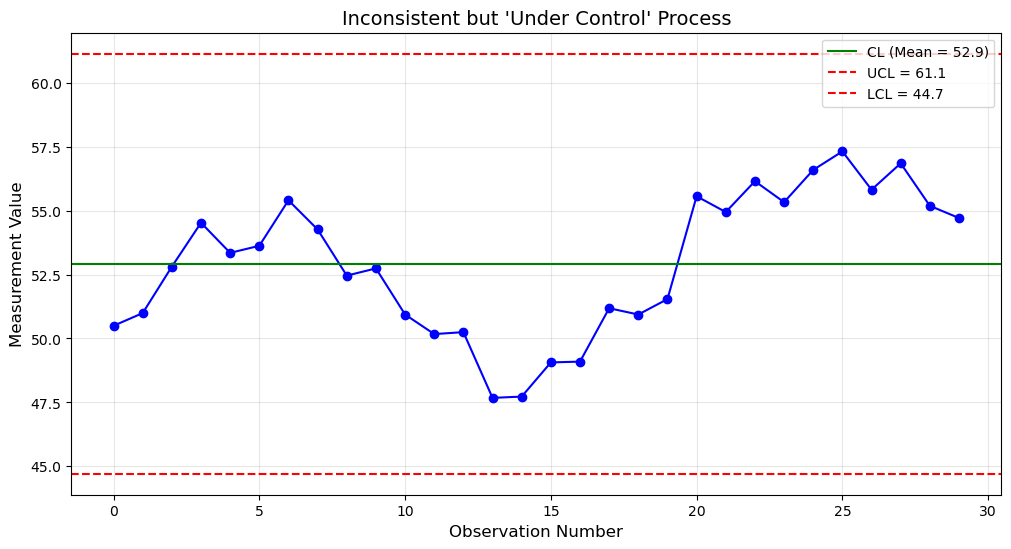

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Generate inconsistent but "in-control" data
np.random.seed(42)
base = 50
trend = np.linspace(0, 5, 30)  # Gradual upward drift
cycles = 3 * np.sin(np.linspace(0, 3*np.pi, 30))  # Cyclic pattern
noise = np.random.normal(0, 1, 30)

data = base + trend + cycles + noise

# Calculate control limits
mean = np.mean(data)
std = np.std(data)
UCL = mean + 3*std
LCL = mean - 3*std

# Plot
plt.figure(figsize=(12,6))
plt.plot(data, marker='o', linestyle='-', color='blue')
plt.axhline(mean, color='green', linestyle='-', label=f'CL (Mean = {mean:.1f})')
plt.axhline(UCL, color='red', linestyle='--', label=f'UCL = {UCL:.1f}')
plt.axhline(LCL, color='red', linestyle='--', label=f'LCL = {LCL:.1f}')

# Annotations
plt.title("Inconsistent but 'Under Control' Process", fontsize=14)
plt.xlabel("Observation Number", fontsize=12)
plt.ylabel("Measurement Value", fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

C:\Users\kolki\AppData\Local\Temp\ipykernel_15248\85003247.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


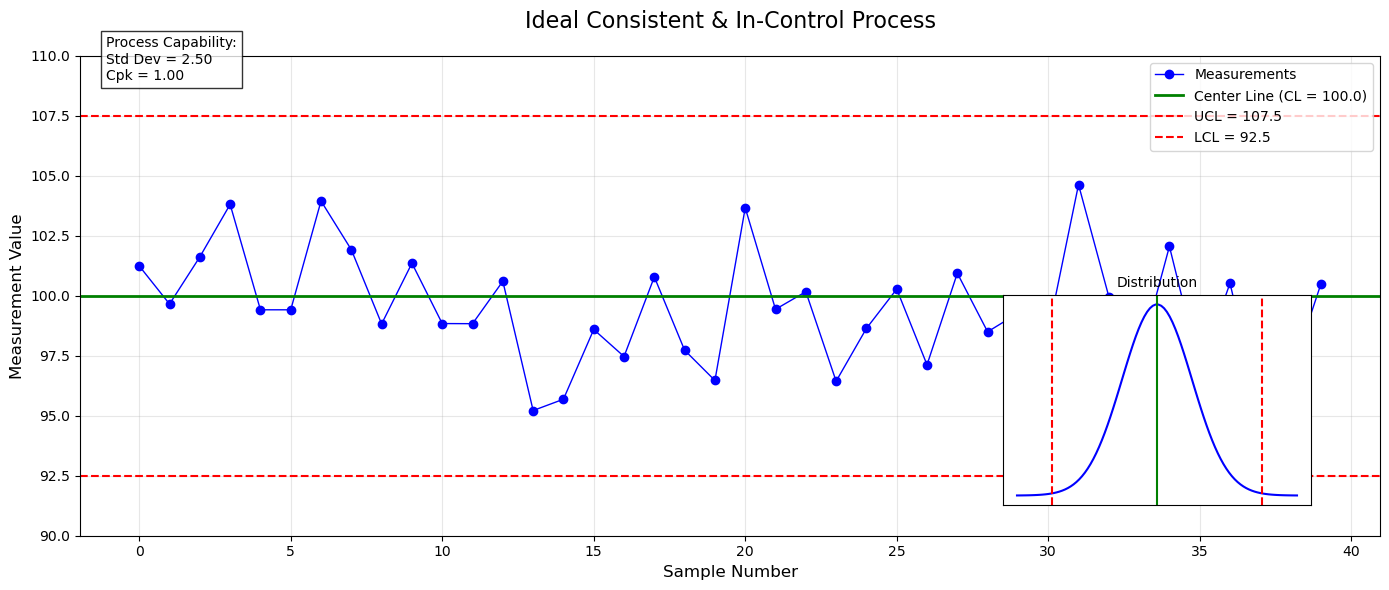

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set parameters for ideal process
np.random.seed(42)  # For reproducibility
process_mean = 100.0
process_std = 2.5
n_points = 40

# Generate ideal in-control data (normal distribution)
data = np.random.normal(process_mean, process_std, n_points)

# Calculate control limits
UCL = process_mean + 3*process_std
LCL = process_mean - 3*process_std

# Create figure
plt.figure(figsize=(14, 6))

# Plot control chart
plt.plot(data, 'bo-', markersize=6, linewidth=1, label='Measurements')
plt.axhline(process_mean, color='green', linestyle='-', 
           linewidth=2, label=f'Center Line (CL = {process_mean:.1f})')
plt.axhline(UCL, color='red', linestyle='--', 
           linewidth=1.5, label=f'UCL = {UCL:.1f}')
plt.axhline(LCL, color='red', linestyle='--', 
           linewidth=1.5, label=f'LCL = {LCL:.1f}')

# Add process capability analysis
cpk = min((process_mean - LCL)/(3*process_std), 
          (UCL - process_mean)/(3*process_std))
plt.text(0.02, 0.95, 
        f'Process Capability:\nStd Dev = {process_std:.2f}\nCpk = {cpk:.2f}',
        transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.8))

# Formatting
plt.title('Ideal Consistent & In-Control Process', fontsize=16, pad=20)
plt.xlabel('Sample Number', fontsize=12)
plt.ylabel('Measurement Value', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, alpha=0.3)
plt.ylim(process_mean - 4*process_std, process_mean + 4*process_std)

# Add distribution plot on the right side
ax_dist = plt.axes([0.72, 0.15, 0.22, 0.35])
x = np.linspace(process_mean - 4*process_std, process_mean + 4*process_std, 100)
ax_dist.plot(x, stats.norm.pdf(x, process_mean, process_std), 'b-')
ax_dist.axvline(process_mean, color='green', linestyle='-')
ax_dist.axvline(UCL, color='red', linestyle='--')
ax_dist.axvline(LCL, color='red', linestyle='--')
ax_dist.set_title('Distribution', fontsize=10)
ax_dist.set_xticks([])
ax_dist.set_yticks([])

plt.tight_layout()
plt.show()

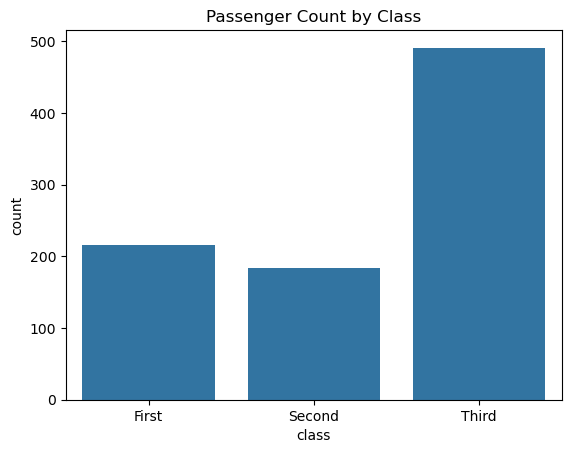

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
df = sns.load_dataset('titanic')
sns.countplot(x='class', data=df)
plt.title('Passenger Count by Class')
plt.show()

C:\Users\kolki\AppData\Local\Temp\ipykernel_1600\3709283985.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='embarked', data=df, palette='viridis', order=['C', 'Q', 'S'])


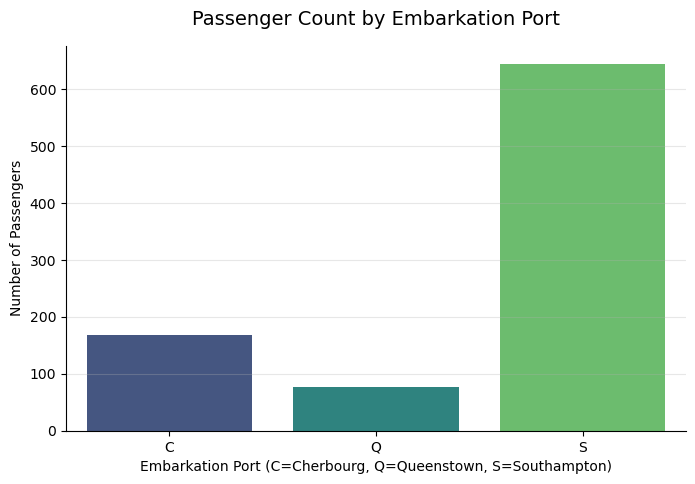

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = sns.load_dataset('titanic')

# Plot 1: Passengers by embarkation port
plt.figure(figsize=(8, 5))
sns.countplot(x='embarked', data=df, palette='viridis', order=['C', 'Q', 'S'])
plt.title('Passenger Count by Embarkation Port', pad=15, fontsize=14)
plt.xlabel('Embarkation Port (C=Cherbourg, Q=Queenstown, S=Southampton)')
plt.ylabel('Number of Passengers')
plt.grid(axis='y', alpha=0.3)
sns.despine()
plt.show()

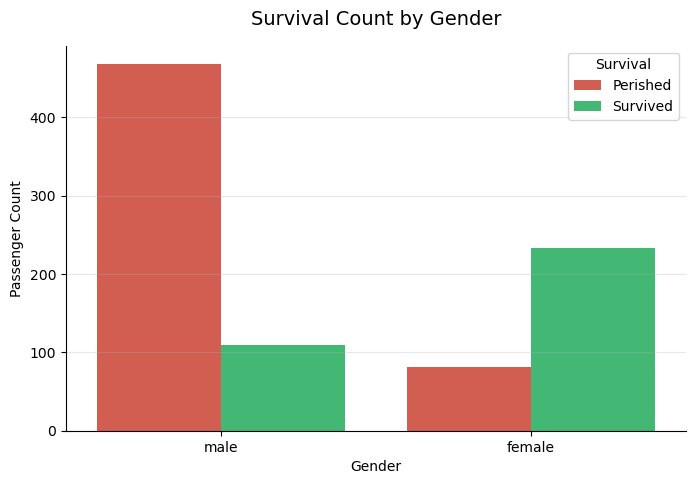

In [4]:
# Plot 2: Survival by gender (stacked)
plt.figure(figsize=(8, 5))
sns.countplot(x='sex', data=df, hue='survived', palette=['#e74c3c', '#2ecc71'])
plt.title('Survival Count by Gender', pad=15, fontsize=14)
plt.xlabel('Gender')
plt.ylabel('Passenger Count')
plt.legend(title='Survival', labels=['Perished', 'Survived'])
plt.grid(axis='y', alpha=0.3)
sns.despine()
plt.show()

Skewness before: 1.1262346334818638


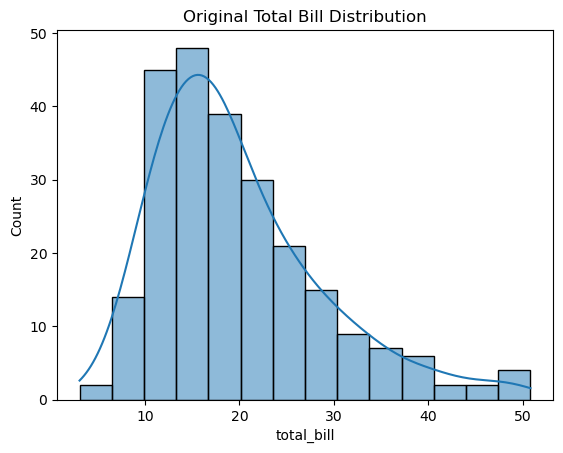

Skewness after: -0.010734357493829156


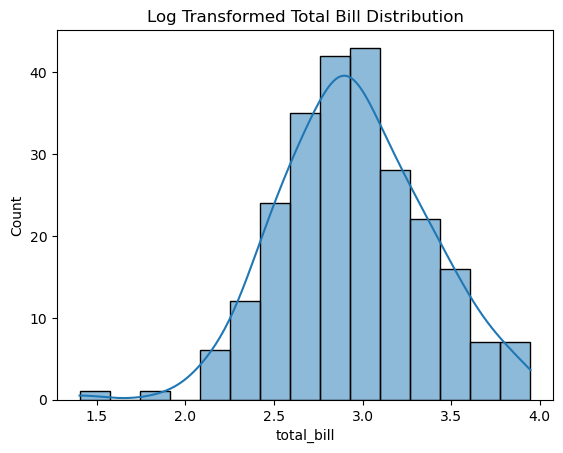

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
data = sns.load_dataset('tips')
skewed_data = data['total_bill']
print('Skewness before:', skew(skewed_data))
sns.histplot(skewed_data, kde=True)
plt.title('Original Total Bill Distribution')
plt.show()
log_transformed = np.log1p(skewed_data)
print('Skewness after:', skew(log_transformed))
sns.histplot(log_transformed, kde=True)
plt.title('Log Transformed Total Bill Distribution')
plt.show()

Exercise:
Load the 'tips' dataset
Plot histogram of 'total_bill' and calculate skewness
Apply np.log1p transformation and re-calculate skewness
Compare both histograms

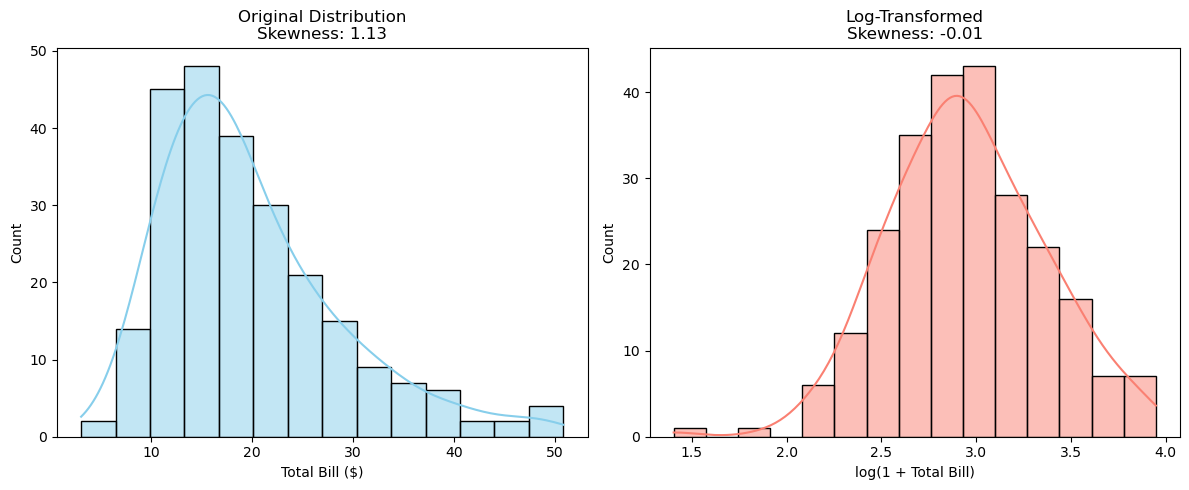

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew

# Load dataset
tips = sns.load_dataset('tips')

# Set up figure
plt.figure(figsize=(12, 5))

# Original distribution
plt.subplot(1, 2, 1)
sns.histplot(tips['total_bill'], kde=True, color='skyblue')
original_skew = skew(tips['total_bill'])
plt.title(f'Original Distribution\nSkewness: {original_skew:.2f}')
plt.xlabel('Total Bill ($)')

# Log-transformed distribution
plt.subplot(1, 2, 2)
log_bill = np.log1p(tips['total_bill'])  # log(1+x) to handle zeros
sns.histplot(log_bill, kde=True, color='salmon')
transformed_skew = skew(log_bill)
plt.title(f'Log-Transformed\nSkewness: {transformed_skew:.2f}')
plt.xlabel('log(1 + Total Bill)')

plt.tight_layout()
plt.show()

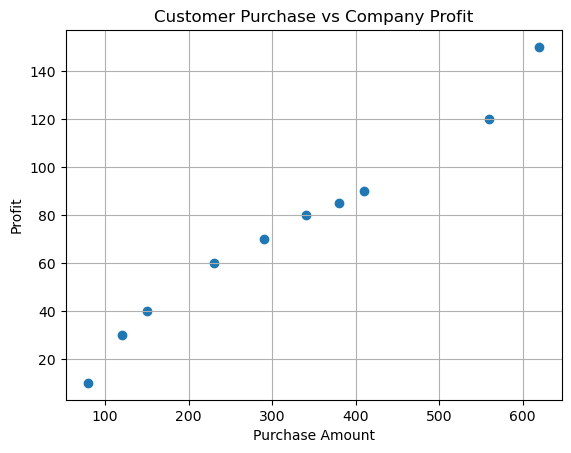

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
data = pd.DataFrame({
'CustomerID': range(1, 11),
'PurchaseAmount': [120, 340, 560, 150, 80, 230, 410, 380, 620, 290],
'Profit': [30, 80, 120, 40, 10, 60, 90, 85, 150, 70]
})
plt.scatter(data['PurchaseAmount'], data['Profit'])
plt.xlabel('Purchase Amount')
plt.ylabel('Profit')
plt.title('Customer Purchase vs Company Profit')
plt.grid(True)
plt.show()

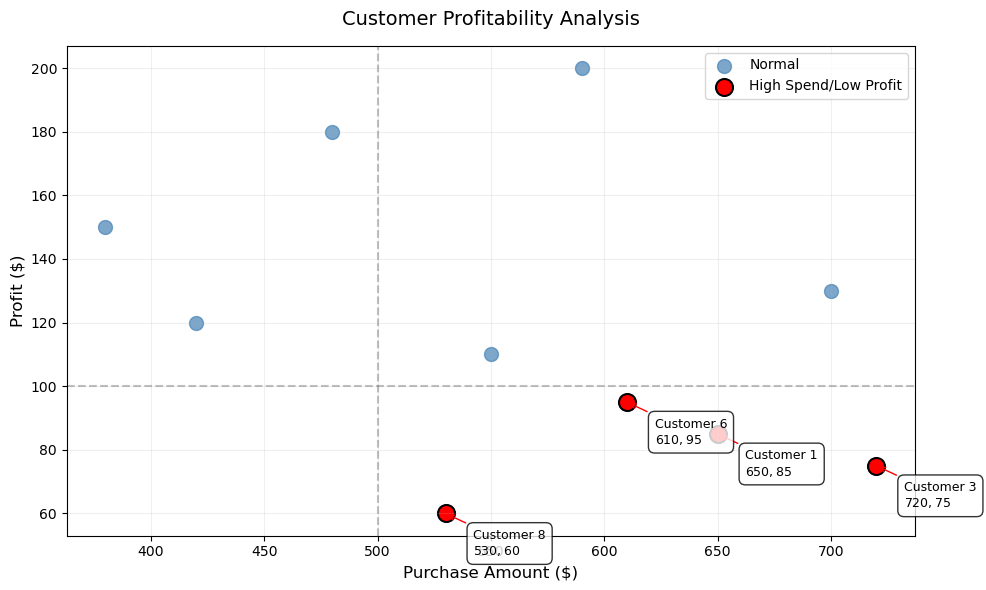


Customer Data:


,CustomerID,PurchaseAmount,Profit
0,1,650,85
1,2,420,120
2,3,720,75
3,4,380,150
4,5,550,110
5,6,610,95
6,7,480,180
7,8,530,60
8,9,700,130
9,10,590,200


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Create sample data with guaranteed highlights
np.random.seed(42)
data = {
    'CustomerID': range(1, 11),
    'PurchaseAmount': [650, 420, 720, 380, 550, 610, 480, 530, 700, 590],
    'Profit': [85, 120, 75, 150, 110, 95, 180, 60, 130, 200]
}
df = pd.DataFrame(data)

# 2. Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['PurchaseAmount'], df['Profit'], color='steelblue', s=100, alpha=0.7, label='Normal')

# 3. Highlight and annotate special cases
highlight_mask = (df['PurchaseAmount'] > 500) & (df['Profit'] < 100)
highlight_df = df[highlight_mask]

if not highlight_df.empty:
    plt.scatter(highlight_df['PurchaseAmount'], highlight_df['Profit'], 
                color='red', s=150, edgecolor='black', linewidth=1.5, 
                label='High Spend/Low Profit')
    
    # Add annotations with arrows
    for _, row in highlight_df.iterrows():
        plt.annotate(f"Customer {row['CustomerID']}\n${row['PurchaseAmount']}, ${row['Profit']}",
                    xy=(row['PurchaseAmount'], row['Profit']),
                    xytext=(20, -30),
                    textcoords='offset points',
                    arrowprops=dict(arrowstyle='->', color='red'),
                    bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.8),
                    fontsize=9)

# 4. Add reference lines and formatting
plt.axhline(y=100, color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=500, color='gray', linestyle='--', alpha=0.5)
plt.title('Customer Profitability Analysis', pad=15, fontsize=14)
plt.xlabel('Purchase Amount ($)', fontsize=12)
plt.ylabel('Profit ($)', fontsize=12)
plt.grid(alpha=0.2)
plt.legend()
plt.tight_layout()

# Show the plot and data
plt.show()
print("\nCustomer Data:")
display(df)

Pivot Table:
Category        A      B      C
Year Month                     
2022 Feb    300.0  180.0  250.0
     Jan    200.0  150.0    NaN
2023 Feb      NaN  210.0    NaN
     Jan    220.0    NaN  270.0
     Mar    310.0    NaN  290.0


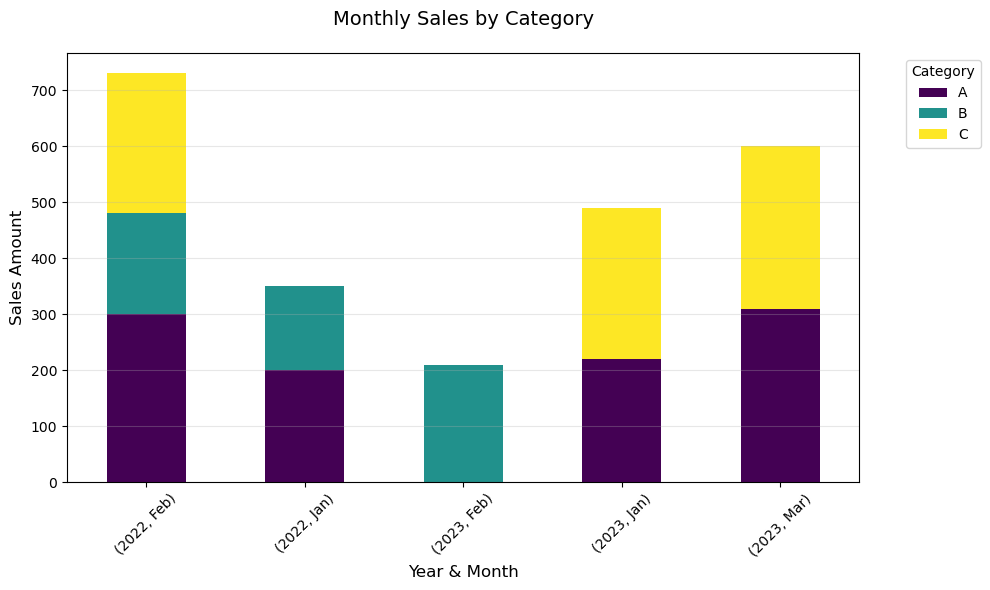

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Create DataFrame (fixed missing comma and quote)
data = pd.DataFrame({
    'Category': ['A', 'B', 'A', 'C', 'B', 'A', 'C', 'B', 'A', 'C'],
    'Year': [2022]*5 + [2023]*5,
    'Month': ['Jan', 'Jan', 'Feb', 'Feb', 'Feb', 'Jan', 'Jan', 'Feb', 'Mar', 'Mar'],
    'Sales': [200, 150, 300, 250, 180, 220, 270, 210, 310, 290]
})

# Create pivot table (fixed closing quote and parenthesis)
pivot = data.pivot_table(index=['Year', 'Month'], columns='Category', values='Sales', aggfunc='sum')

# Print pivot table
print("Pivot Table:")
print(pivot)

# Plotting (improved visualization)
pivot.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Monthly Sales by Category', pad=20, fontsize=14)
plt.ylabel('Sales Amount', fontsize=12)
plt.xlabel('Year & Month', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Sales Summary:
ProductCategory  Clothing  Electronics  Home Goods
Year Month                                        
2022 Feb                0          624         447
     Jan             1109          430         830
     Mar              195          143        1151
2023 Feb              645          604         809
     Jan              950         1332        1559
     Mar             1535         1064        1577


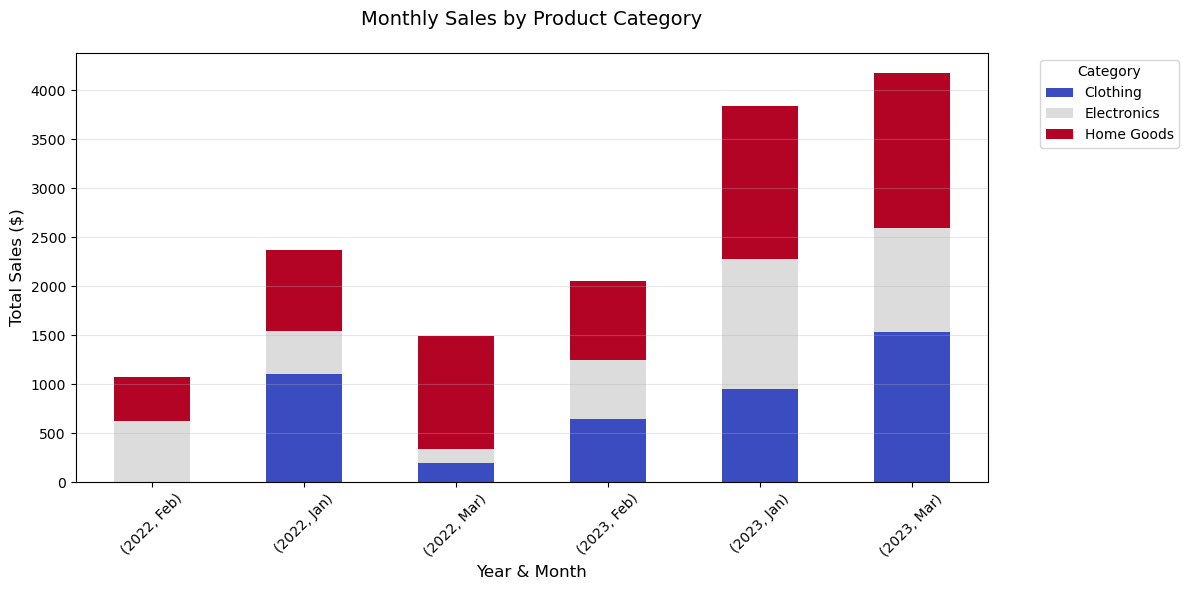


Answer: In February 2023, Home Goods had the highest sales with $809


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Create simulated dataset
np.random.seed(42)
data = pd.DataFrame({
    'ProductCategory': np.random.choice(['Electronics', 'Clothing', 'Home Goods'], 50),
    'Year': np.random.choice([2022, 2023], 50),
    'Month': np.random.choice(['Jan', 'Feb', 'Mar'], 50),
    'Sales': np.random.randint(100, 500, 50)
})

# 2. Create pivot table
pivot = data.pivot_table(
    index=['Year', 'Month'],
    columns='ProductCategory',
    values='Sales',
    aggfunc='sum',
    fill_value=0  # Replace NaN with 0 for cleaner visualization
)

print("Sales Summary:")
print(pivot)

# 3. Create stacked bar chart
pivot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
plt.title('Monthly Sales by Product Category', pad=20, fontsize=14)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xlabel('Year & Month', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# 4. Answer the specific question
feb_2023_sales = pivot.loc[(2023, 'Feb')]
highest_category = feb_2023_sales.idxmax()
highest_sales = feb_2023_sales.max()

print(f"\nAnswer: In February 2023, {highest_category} had the highest sales with ${highest_sales:,.0f}")